<a href="https://colab.research.google.com/github/Meghna27si/Meghna27si/blob/main/Credit_card_fraud_detection_report_(research).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import all the required libraries**





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE


from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

import joblib

In [ ]:
# Load dataset
df = pd.read_csv('/content/creditcard.csv')

In [ ]:
# Display first few rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
# Display All Columns
pd.options.display.max_columns = None
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
# Display dataset shape
df.shape

(140703, 31)

In [ ]:
print("Number of columns: {}".format(df.shape[1]))
print("Number of rows: {}".format(df.shape[0]))

Number of columns: 31
Number of rows: 140703


In [ ]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140703 entries, 0 to 140702
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    140703 non-null  int64  
 1   V1      140703 non-null  float64
 2   V2      140703 non-null  float64
 3   V3      140703 non-null  float64
 4   V4      140703 non-null  float64
 5   V5      140702 non-null  float64
 6   V6      140702 non-null  float64
 7   V7      140702 non-null  float64
 8   V8      140702 non-null  float64
 9   V9      140702 non-null  float64
 10  V10     140702 non-null  float64
 11  V11     140702 non-null  float64
 12  V12     140702 non-null  float64
 13  V13     140702 non-null  float64
 14  V14     140702 non-null  float64
 15  V15     140702 non-null  float64
 16  V16     140702 non-null  float64
 17  V17     140702 non-null  float64
 18  V18     140702 non-null  float64
 19  V19     140702 non-null  float64
 20  V20     140702 non-null  float64
 21  V21     14

In [ ]:
# Summary statistics
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,140703.000000,140703.000000,140703.000000,140703.000000,140703.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000
mean,52017.063240,-0.249590,0.018631,0.672709,0.139629,-0.282394,0.079221,-0.117074,0.065108,-0.092798,-0.019711,0.210835,0.026681,-0.017456,0.030024,0.226097,-0.007317,0.043815,-0.085053,-0.018442,0.042551,-0.039490,-0.118699,-0.033307,0.011971,0.130149,0.023568,0.000598,0.002314,91.113847,0.001876
std,20935.874366,1.815360,1.612924,1.267514,1.321903,1.306687,1.283716,1.166104,1.230387,1.088043,1.049987,1.048182,1.020288,0.998237,0.916731,0.925427,0.877954,0.883405,0.832589,0.808304,0.721050,0.721606,0.635249,0.591371,0.595799,0.437282,0.491940,0.388942,0.306960,247.063579,0.043276
min,0.000000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,-18.271168,-4.049895,-17.769143,-5.791881,-19.214325,-4.152532,-13.563273,-25.162799,-9.498746,-7.213527,-21.024817,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-22.565679,-11.710896,0.000000,0.000000
25%,38001.000000,-1.020857,-0.563417,0.169911,-0.713458,-0.903456,-0.661857,-0.603665,-0.130976,-0.714885,-0.491976,-0.547047,-0.375521,-0.672049,-0.343552,-0.310538,-0.475458,-0.410107,-0.550085,-0.506351,-0.169408,-0.226122,-0.548084,-0.171745,-0.325037,-0.136357,-0.326105,-0.060363,-0.004166,6.000000,0.000000
50%,53833.000000,-0.270868,0.105003,0.750128,0.167426,-0.314577,-0.176481,-0.064121,0.080542,-0.155239,-0.098314,0.125509,0.165729,-0.019329,0.060606,0.336925,0.071620,-0.021930,-0.084598,-0.018713,-0.026507,-0.059815,-0.095822,-0.044999,0.068728,0.166478,-0.064879,0.011792,0.023610,23.900000,0.000000
75%,69573.000000,1.157957,0.777163,1.362846,0.992618,0.237702,0.465523,0.409937,0.375410,0.481411,0.422900,1.032423,0.651319,0.642332,0.454459,0.893565,0.532741,0.430167,0.386750,0.476920,0.164840,0.113589,0.300817,0.083280,0.408711,0.418682,0.286656,0.087069,0.077145,80.910000,0.000000
max,83879.000000,1.960497,18.902453,9.382558,16.715537,34.801666,22.529298,36.677268,20.007208,15.594995,23.745136,12.018913,7.848392,4.465413,10.526766,5.784514,6.098529,9.253526,5.041069,5.228342,39.420904,27.202839,10.503090,19.002942,4.022866,5.541598,3.517346,12.152401,33.847808,19656.530000,1.000000


In [ ]:
df['Class'].value_counts()

,count
Class,
0.0,140438
1.0,264


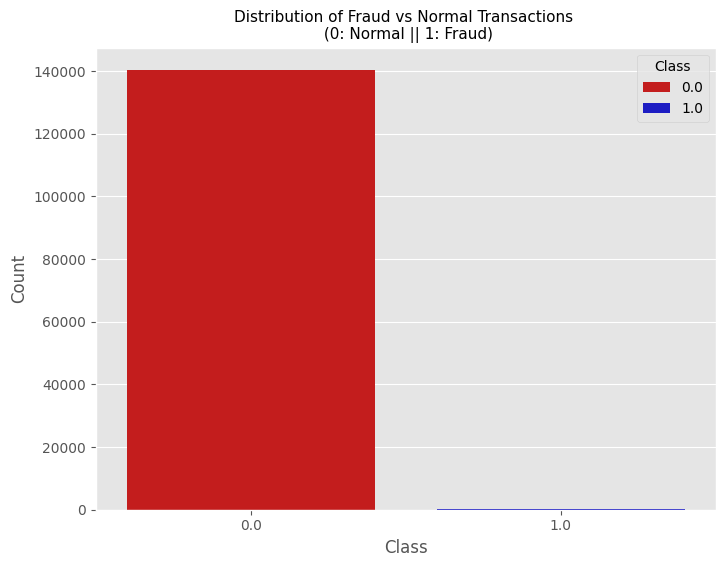

In [ ]:
# Visualize the distribution of the target variable
plt.style.use('ggplot')
plt.figure(figsize=(8, 6))
colors = [ "#DF0101", "#0101DF"]
sns.countplot(x='Class', data = df, palette=colors, hue='Class')
plt.title('Distribution of Fraud vs Normal Transactions \n (0: Normal || 1: Fraud)', fontsize=11)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Data Preprocessing
Check for missing or null values.
Handle duplicates.
Scale the features (Amount, Time).
Split features and target.

In [ ]:
# Check for missing values
df.isnull().sum().sum()

26

In [ ]:
# Check for duplicate rows
df.duplicated().sum()

529

In [ ]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(140174, 31)

In [ ]:
# Standardize 'Amount' and 'Time'
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])
df['Time'] = scaler.fit_transform(df[['Time']])

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-2.485056,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.236000,0.0
1,-2.485056,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.357929,0.0
2,-2.485008,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.161840,0.0
3,-2.485008,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.130416,0.0
4,-2.484960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.085885,0.0


In [ ]:
# Split features and target
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
# Calculate the correlation matrix
corr_matrix = df.corr()
corr_matrix

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.001060,0.004288,-0.026590,-0.034479,-0.026559,-0.019074,-0.003936,0.019414,-0.201152,0.041268,-0.144130,0.352383,-0.185454,-0.162621,0.114607,0.001346,-0.082814,0.005870,0.013784,-0.001756,-0.012220,-0.012328,0.009582,0.004290,-0.002480,-0.008324,-0.008829,-0.000936,-0.007386,-0.020756
V1,0.001060,1.000000,0.011765,0.195167,-0.048145,0.004909,0.052915,0.075056,-0.020104,-0.052033,-0.001713,0.016468,-0.018252,-0.002797,0.021540,0.053164,0.016054,0.025714,-0.007960,0.005846,-0.055747,-0.009564,-0.064118,-0.086200,-0.015765,0.209049,0.010825,-0.017204,0.151605,-0.240707,-0.124521
V2,0.004288,0.011765,1.000000,-0.090084,0.038922,-0.031496,0.012575,-0.012101,0.012599,0.001600,0.025423,0.024603,-0.004315,0.034529,0.003878,0.082876,0.040740,-0.049716,-0.018672,0.006200,-0.078666,-0.041205,-0.014444,0.023610,-0.018961,-0.093875,-0.030813,0.003542,0.022922,-0.549919,0.100671
V3,-0.026590,0.195167,-0.090084,1.000000,-0.063460,0.163139,-0.082144,0.178111,-0.115505,0.098701,0.068226,-0.067910,0.059065,-0.058053,0.044067,-0.191695,-0.072756,0.069517,-0.034325,-0.026354,-0.101959,0.055660,0.241749,0.036154,0.027677,-0.196718,0.034641,-0.050771,0.031050,-0.226934,-0.264268
V4,-0.034479,-0.048145,0.038922,-0.063460,1.000000,0.010736,-0.039761,0.001828,0.030006,0.045808,-0.084813,0.002366,0.043175,-0.014990,-0.005996,-0.031721,-0.069815,0.017015,-0.037094,0.016055,0.015904,0.023293,0.040145,-0.009228,-0.003723,-0.003358,-0.027572,0.031131,-0.005625,0.094294,0.143190
V5,-0.026559,0.004909,-0.031496,0.163139,0.010736,1.000000,0.060795,-0.032982,-0.015806,0.022805,0.044816,-0.012480,0.016194,0.048667,0.020648,0.113317,0.109135,-0.056594,0.039007,0.023800,-0.037331,-0.038999,-0.097068,0.010765,-0.018180,-0.013686,-0.044004,-0.011286,-0.009660,-0.394832,-0.121265
V6,-0.019074,0.052915,0.012575,-0.082144,-0.039761,0.060795,1.000000,0.026080,-0.040041,0.038183,-0.018874,-0.093428,0.008391,-0.014726,0.022046,-0.120139,-0.020976,-0.000282,0.046739,0.095726,0.040734,0.001036,0.052719,-0.020082,-0.005587,0.047974,0.009879,-0.015050,-0.005083,0.201900,-0.056916
V7,-0.003936,0.075056,-0.012101,0.178111,0.001828,-0.032982,0.026080,1.000000,0.017260,0.035530,0.040117,0.008357,0.044694,0.025415,0.003346,0.085560,0.059523,-0.003050,0.026827,-0.036738,0.050310,0.044318,-0.067077,0.063659,-0.000906,-0.099225,-0.027210,-0.079114,-0.039781,0.375147,-0.206734
V8,0.019414,-0.020104,0.012599,-0.115505,0.030006,-0.015806,-0.040041,0.017260,1.000000,0.001303,-0.017736,0.001952,-0.044252,0.001042,-0.038223,-0.042418,-0.047474,-0.032289,-0.019320,0.032973,-0.045784,0.106493,0.004921,-0.016004,0.010322,0.014941,0.009610,0.012355,0.013324,-0.091121,0.078258
V9,-0.201152,-0.052033,0.001600,0.098701,0.045808,0.022805,0.038183,0.035530,0.001303,1.000000,-0.037992,-0.018649,-0.001434,-0.041277,0.014386,-0.105533,-0.055795,0.068821,-0.040409,0.016828,0.029648,0.016795,0.052209,-0.049820,0.015744,0.132772,0.099700,-0.000877,-0.023899,-0.020945,-0.101312


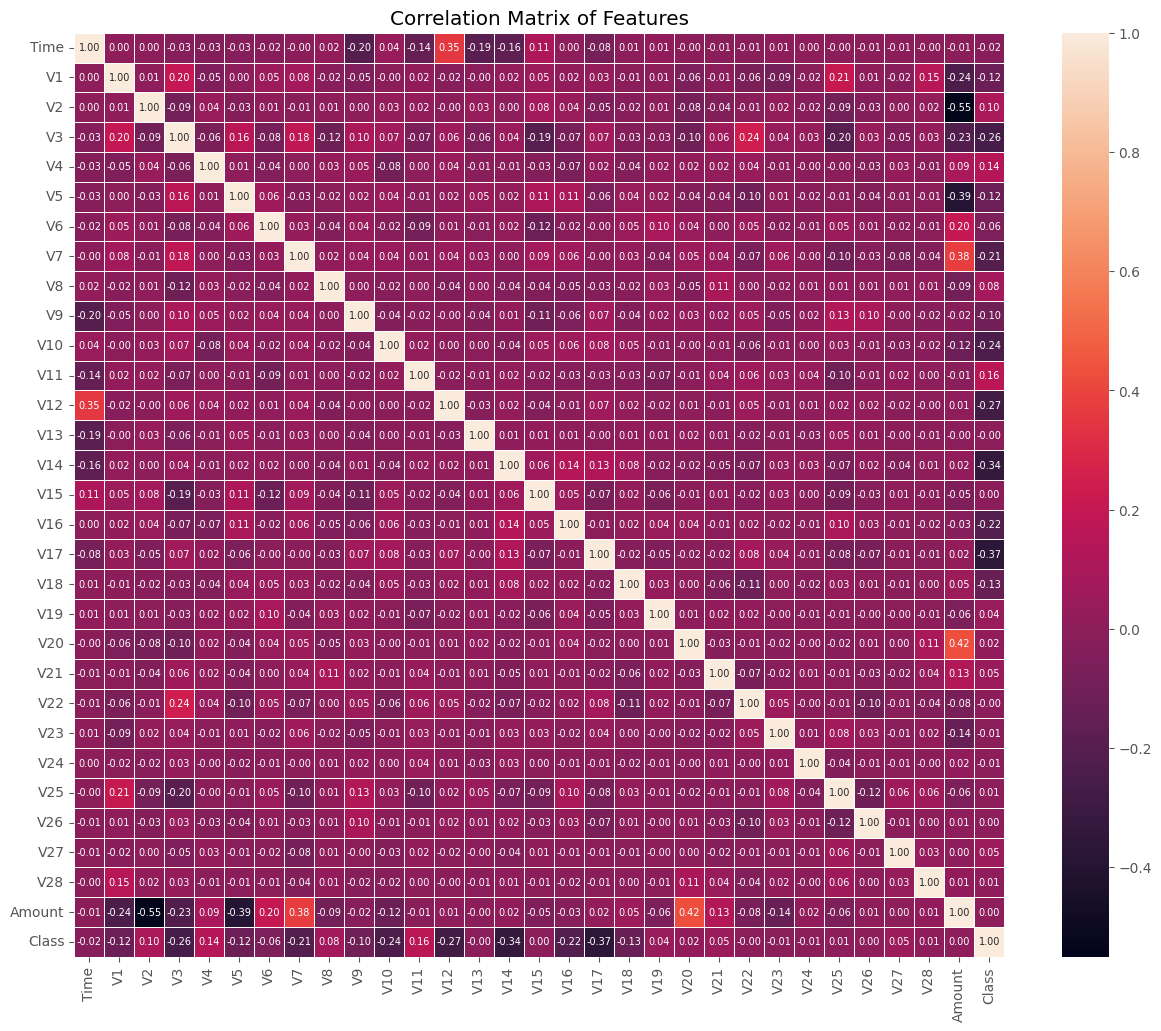

In [ ]:
# Plot the Heatmap
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidths=0.5, annot_kws={"size":7})
plt.title('Correlation Matrix of Features')
plt.show()

## Split Data into Training and Test Sets

In [ ]:
# Train-test split with imbalanced data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train-test split with imbalanced data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Check the shape
X_train.shape

(112139, 30)

In [ ]:
X_test.shape

(28035, 30)

# Train and Evaluate Model on Imbalanced Data
**bold text**# Train a model and evaluate its performance on the imbalanced dataset.

In [ ]:
def train_model(X_train, X_test, y_train, y_test):
    """
    Trains and evaluates multiple classifiers on the given training and test datasets.

    This function takes training and test feature sets and labels, trains three different classifiers
    (Logistic Regression, Decision Tree Classifier, and RandomForestClassifier) on the training data,
    and evaluates their performance on the test data. For each classifier, it prints the confusion matrix,
    classification report, ROC-AUC score, and plots the ROC curve.

    Parameters:
    X_train (pd.DataFrame or np.ndarray): Features of the training data.
    X_test (pd.DataFrame or np.ndarray): Features of the test data.
    y_train (pd.Series or np.ndarray): Labels of the training data.
    y_test (pd.Series or np.ndarray): Labels of the test data.

    Returns:
    None: This function does not return any values but prints evaluation metrics and plots.

    Notes:
    - The function assumes that the test data includes both positive and negative class samples.
    - ROC-AUC scores and ROC curves are only meaningful if the classifier provides probability estimates
      for the positive class.
    - This function will display the ROC curves in separate plots for each classifier.
    """

    classifier = {
        "Logistic Regression": LogisticRegression(),
        "Decision Tree Classifier": DecisionTreeClassifier(),
        "RandomForestClassifier": RandomForestClassifier(random_state=42)
    }

    for name, model in classifier.items():
        print(f"\n================ {name} ================\n")
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred)
        print(f"Confusion Matrix:\n{conf_matrix}\n")

        # Accuracy
        print(f"\nAccuracy: {accuracy_score(y_test, y_pred)}\n")

        # Classification report
        clf_report = classification_report(y_test, y_pred)
        print(f"\nClassification Report:\n{clf_report}\n")

        # ROC-AUC Score
        roc_auc = roc_auc_score(y_test, y_pred)
        print(f"ROC-AUC Score (Imbalanced Data): {roc_auc}\n")

        # Plot ROC Curve
        fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
        plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve (Imbalanced Data)\nusing {name}', fontsize=10)
        plt.legend(loc='best')
        plt.show()
        print("\n")

In [ ]:
!pip install scikit-learn
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer # Import SimpleImputer

def train_model(X_train, X_test, y_train, y_test):
    """
    Trains and evaluates multiple classifiers on the given training and test datasets.

    This function takes training and test feature sets and labels, trains three different classifiers
    (Logistic Regression, Decision Tree Classifier, and RandomForestClassifier) on the training data,
    and evaluates their performance on the test data. For each classifier, it prints the confusion matrix,
    classification report, ROC-AUC score, and plots the ROC curve.

    Parameters:
    X_train (pd.DataFrame or np.ndarray): Features of the training data.
    X_test (pd.DataFrame or np.ndarray): Features of the test data.
    y_train (pd.Series or np.ndarray): Labels of the training data.
    y_test (pd.Series or np.ndarray): Labels of the test data.

    Returns:
    None: This function does not return any values but prints evaluation metrics and plots.

    Notes:
    - The function assumes that the test data includes both positive and negative class samples.
    - ROC-AUC scores and ROC curves are only meaningful if the classifier provides probability estimates
      for the positive class.
    - This function will display the ROC curves in separate plots for each classifier.
    """

    classifier = {
        "Logistic Regression": LogisticRegression(),
        "Decision Tree Classifier": DecisionTreeClassifier(),
        "RandomForestClassifier": RandomForestClassifier(random_state=42)
    }

    # Create an imputer to fill missing values with the mean
    imputer = SimpleImputer(strategy='mean')

    # Fit and transform the imputer on the training data
    X_train = imputer.fit_transform(X_train)

    # Transform the test data using the trained imputer
    X_test = imputer.transform(X_test)


    for name, model in classifier.items():
        print(f"\n================ {name} ================\n")
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred)
        print(f"Confusion Matrix:\n{conf_matrix}\n")

        # Accuracy
        print(f"\nAccuracy: {accuracy_score(y_test, y_pred)}\n")

        # Classification report
        clf_report = classification_report(y_test, y_pred)
        print(f"\nClassification Report:\n{clf_report}\n")

        # ROC-AUC Score
        roc_auc = roc_auc_score(y_test, y_pred)
        print(f"ROC-AUC Score (Imbalanced Data): {roc_auc}\n")

        # Plot ROC Curve
        fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
        plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve (Imbalanced Data)\nusing {name}', fontsize=10)
        plt.legend(loc='best')
        plt.show()
        print("\n")

In [ ]:
y_train = y_train.fillna(y_train.mode()[0])
y_test = y_test.fillna(y_test.mode()[0])



================ Logistic Regression ================



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
[[27963     4]
 [   30    38]]


Accuracy: 0.9987872302479044


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     27967
         1.0       0.90      0.56      0.69        68

    accuracy                           1.00     28035
   macro avg       0.95      0.78      0.85     28035
weighted avg       1.00      1.00      1.00     28035


ROC-AUC Score (Imbalanced Data): 0.7793402518514467



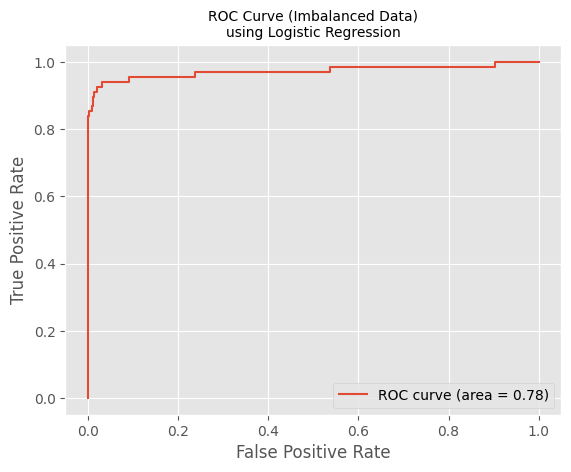




================ Decision Tree Classifier ================

Confusion Matrix:
[[27956    11]
 [   11    57]]


Accuracy: 0.999215266630997


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     27967
         1.0       0.84      0.84      0.84        68

    accuracy                           1.00     28035
   macro avg       0.92      0.92      0.92     28035
weighted avg       1.00      1.00      1.00     28035


ROC-AUC Score (Imbalanced Data): 0.9189209867091258



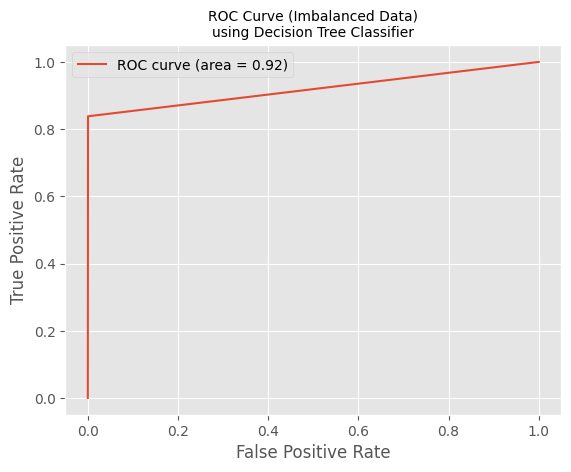




================ RandomForestClassifier ================

Confusion Matrix:
[[27966     1]
 [   11    57]]


Accuracy: 0.9995719636169075


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     27967
         1.0       0.98      0.84      0.90        68

    accuracy                           1.00     28035
   macro avg       0.99      0.92      0.95     28035
weighted avg       1.00      1.00      1.00     28035


ROC-AUC Score (Imbalanced Data): 0.9190997688452147



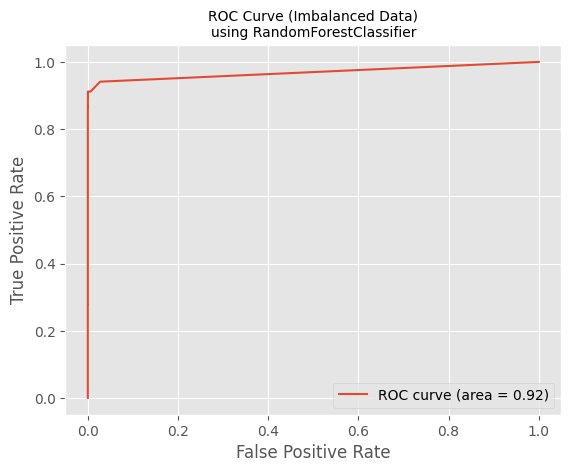

In [ ]:
# Call the train_model function
train_model(X_train, X_test, y_train, y_test)

# **Handling Imbalanced Data¶**
Two techniques:

Undersampling
Oversampling

# **Undersampling**

In [ ]:
# Separate normal and fraud transactions
normal = df[df['Class']==0]
fraud = df[df['Class']==1]

# Print shape for reference
print(f"Normal transactions shape: {normal.shape}")
print(f"Fraud transactions shape: {fraud.shape}")

Normal transactions shape: (139914, 31)
Fraud transactions shape: (259, 31)


In [ ]:
# Undersample normal transactions
normal_sample = normal.sample(n=fraud.shape[0])

In [ ]:
# Print the shape of the new normal transactions
print(f"New normal transactions shape: {normal_sample.shape}")

New normal transactions shape: (259, 31)


In [ ]:
# Concate updated normal transcations with old fraud transaction and make a new df
new_df = pd.concat([normal_sample, fraud], ignore_index=True)

In [ ]:
# Print few rows of new df
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.265874,-0.650852,1.158935,1.452107,-0.418704,0.345532,-1.070866,0.926407,-0.217397,-0.578463,-0.872460,-0.172535,0.425999,1.002291,-0.637869,0.327565,0.578876,-0.326142,-0.318608,-0.754093,-0.062086,-0.158318,-0.545300,-0.037939,0.352010,-0.302043,-0.104825,-0.067846,0.143798,-0.365205,0.0
1,-1.063236,-1.391668,-0.498857,2.403327,-1.937609,0.152528,-0.582191,0.764496,-0.570707,2.084935,-0.770256,-0.937222,-0.486887,-1.010932,-0.914339,1.000558,-0.317292,-0.855541,0.485250,0.242741,0.082299,-0.206954,0.210099,-0.185028,-0.138485,0.610203,-0.805501,-0.404044,-0.407058,-0.126672,0.0
2,1.325013,1.225925,0.422121,0.027891,1.368447,-0.034471,-0.477816,0.020405,-0.059273,0.475617,-0.655673,-0.807281,0.096201,-0.096962,-1.286903,-0.008391,0.245003,0.689232,0.151110,0.057713,-0.110209,-0.356258,-0.826793,-0.050617,-0.238743,0.587586,-0.493941,0.052706,0.048149,-0.349077,0.0
3,0.806520,1.174641,-0.084897,-0.256067,-0.219802,-0.149242,-0.888968,0.348767,-0.191992,-0.257254,-0.034703,1.211563,0.696075,-0.309682,0.721084,0.192611,0.303084,-0.499879,-0.350087,0.742079,0.057121,-0.318735,-1.144258,0.044904,0.036720,0.185374,0.733109,-0.127805,-0.004269,-0.086047,0.0
4,1.360267,-1.401896,-0.404854,1.225408,-0.753578,0.589964,-0.266473,1.055737,0.167582,-0.283961,-1.092427,0.841915,0.961579,-0.386421,0.065255,-1.991974,0.083050,-0.554429,-0.581759,-1.471737,0.222030,0.180618,0.113046,0.341806,0.029007,0.017741,0.004491,-0.021231,0.131447,0.363534,0.0


In [ ]:
# Check new class distribution
new_df['Class'].value_counts()

,count
Class,
0.0,259
1.0,259


In [ ]:
# Split new df into X and y
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [ ]:
# Train test split on Undersampled data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


================ Logistic Regression ================

Confusion Matrix:
[[51  2]
 [ 5 46]]


Accuracy: 0.9326923076923077


Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.94        53
         1.0       0.96      0.90      0.93        51

    accuracy                           0.93       104
   macro avg       0.93      0.93      0.93       104
weighted avg       0.93      0.93      0.93       104


ROC-AUC Score (Imbalanced Data): 0.9321124676285608



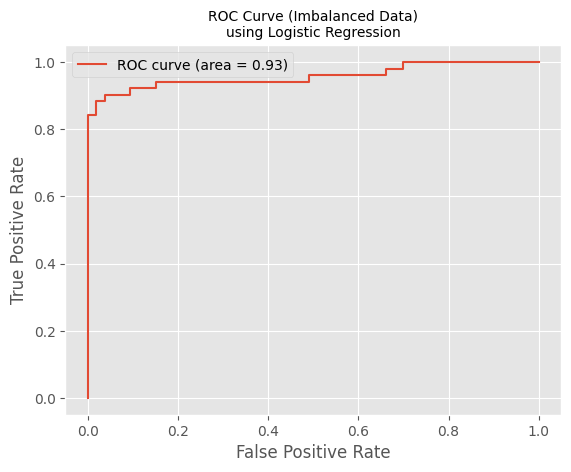




================ Decision Tree Classifier ================

Confusion Matrix:
[[43 10]
 [ 9 42]]


Accuracy: 0.8173076923076923


Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.81      0.82        53
         1.0       0.81      0.82      0.82        51

    accuracy                           0.82       104
   macro avg       0.82      0.82      0.82       104
weighted avg       0.82      0.82      0.82       104


ROC-AUC Score (Imbalanced Data): 0.8174250832408435



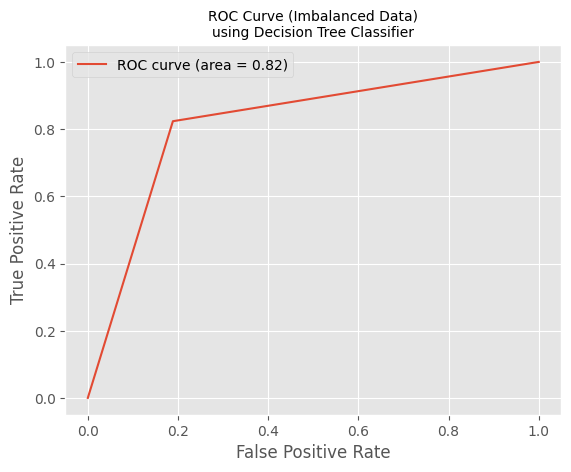




================ RandomForestClassifier ================

Confusion Matrix:
[[50  3]
 [ 8 43]]


Accuracy: 0.8942307692307693


Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90        53
         1.0       0.93      0.84      0.89        51

    accuracy                           0.89       104
   macro avg       0.90      0.89      0.89       104
weighted avg       0.90      0.89      0.89       104


ROC-AUC Score (Imbalanced Data): 0.8932667406585277



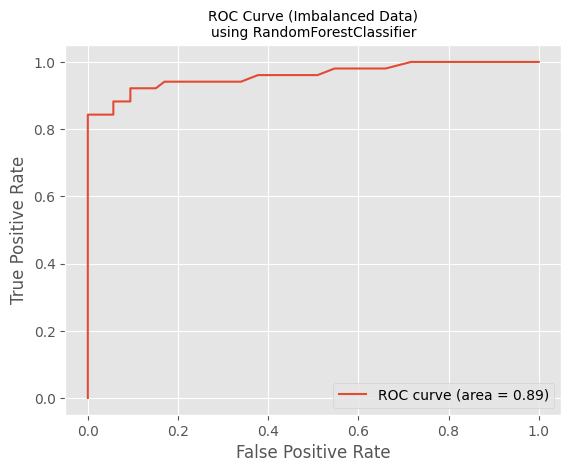

In [ ]:
# Train models with undersampled data
# Call the train_model function
train_model(X_train, X_test, y_train, y_test)

# **Oversampling**

In [ ]:
# Split features and target
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
X = X[y.notnull()]
y = y.dropna()

In [ ]:
y = y.fillna(y.mode()[0])  # Filling with mode


In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [ ]:
# Check new class distribution
y_resampled.value_counts()

,count
Class,
0.0,139914
1.0,139914


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


================ Logistic Regression ================



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
[[27343   618]
 [ 1915 26090]]


Accuracy: 0.9547403780866955


Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96     27961
         1.0       0.98      0.93      0.95     28005

    accuracy                           0.95     55966
   macro avg       0.96      0.95      0.95     55966
weighted avg       0.96      0.95      0.95     55966


ROC-AUC Score (Imbalanced Data): 0.9547585699445259



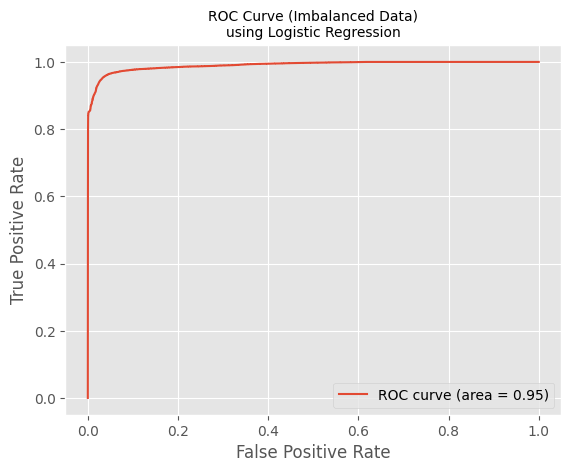




================ Decision Tree Classifier ================

Confusion Matrix:
[[27904    57]
 [   25 27980]]


Accuracy: 0.9985348247150055


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     27961
         1.0       1.00      1.00      1.00     28005

    accuracy                           1.00     55966
   macro avg       1.00      1.00      1.00     55966
weighted avg       1.00      1.00      1.00     55966


ROC-AUC Score (Imbalanced Data): 0.9985343742838282



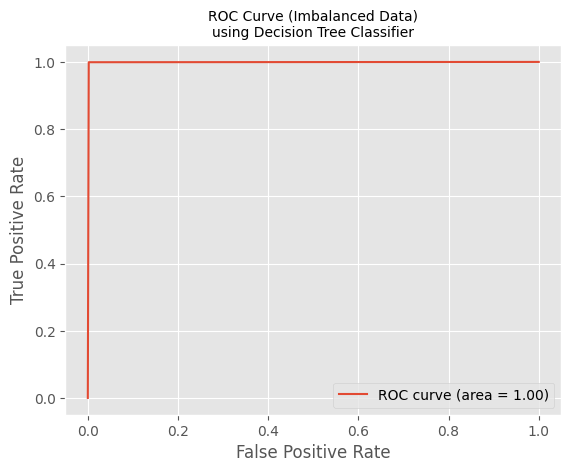




================ RandomForestClassifier ================

Confusion Matrix:
[[27958     3]
 [    0 28005]]


Accuracy: 0.9999463960261588


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     27961
         1.0       1.00      1.00      1.00     28005

    accuracy                           1.00     55966
   macro avg       1.00      1.00      1.00     55966
weighted avg       1.00      1.00      1.00     55966


ROC-AUC Score (Imbalanced Data): 0.9999463538500053



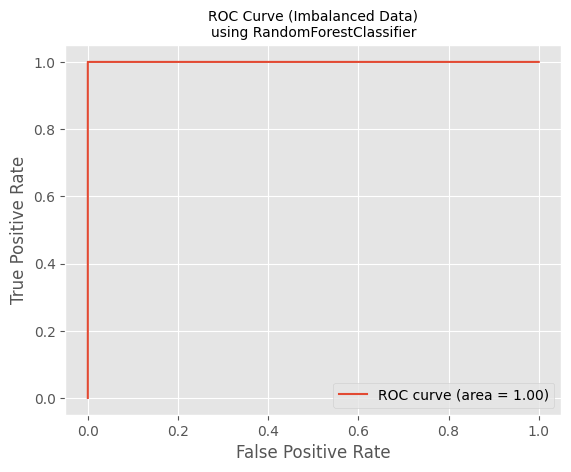

In [ ]:
# Train models with undersampled data
# Call the train_model function
train_model(X_train, X_test, y_train, y_test)

# **Save the Trained Model (Decision Tree Classifier)**

In [ ]:
# Pick a model, e.g. Decision Tree Classifier
# Fit the model with X_train, y_train
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Save the model
joblib.dump(model, "credit_card_model.pkl")

['credit_card_model.pkl']

# **Load the model**

In [ ]:
# Load the model
model = joblib.load("credit_card_model.pkl")

In [ ]:
# Predict with a sample data
pred = model.predict([[-1.2063166480452974,-0.653464067093327,1.15579454161356,1.4398458100309,-0.0483979577939286,-0.257954764175468,-0.763320426103366,0.339229688923037,-0.768705965846787,-0.115541693321453,-0.20021646873148,-0.650926246487322,-0.735778340137806,-1.3940656101548,0.447721760826057,0.98477163074674,0.271223077633162,-0.251055900420813,-0.165413052650476,0.0091942158033362,-0.160498072645411,0.518041029678345,-0.970619090556498,0.104889604203672,0.307935462300307,-0.222502578722938,0.0825004649897294,0.291624326333603,0.125488524044667,-0.3442213776454372]])

# Print the prediction
if pred == 0:
    print("Normal Transaction")
else:
    print("Fraud Transaction")

Normal Transaction


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## **Conclusion **
In this analysis, we performed a comprehensive exploration and modeling process for credit card fraud detection using an imbalanced dataset. The steps included:

Data Exploration and Preprocessing: We began by loading and exploring the dataset, visualizing class imbalance, and performing necessary preprocessing steps.

Correlation Analysis: By investigating the correlations between features, we gained insights into how features interact with each other. This helped in identifying potential redundancies and understanding feature relationships.

Handling Imbalanced Data: We applied techniques such as undersampling and oversampling to address the class imbalance. This was crucial in ensuring that our models could better learn from the minority class.

Model Training and Evaluation: We trained and evaluated various classifiers, including Logistic Regression, Decision Tree, and RandomForest. We assessed model performance using metrics such as confusion matrices, classification reports, ROC-AUC scores, and ROC curves.

Model Saving: The trained models were saved for future use, ensuring that we can easily load and apply them for predictions on new data.

Key Findings:

Feature Correlations: Our correlation analysis revealed important relationships between features. This understanding can guide feature selection and engineering in future analyses.

Model Performance: The RandomForestClassifier demonstrated high accuracy in detecting fraud, showing that it is a strong candidate for deployment. The ROC-AUC scores and ROC curves provided insights into each model’s performance, particularly in distinguishing between fraudulent and non-fraudulent transactions.

Impact of Imbalance Handling: Techniques for balancing the dataset were essential in improving model performance and ensuring that the minority class (fraudulent transactions) was adequately represented in the training process.

Overall, this analysis has provided a robust framework for credit card fraud detection. The insights gained from feature correlations and model evaluations will be instrumental in refining our approach and improving detection capabilities. Future work could involve fine-tuning models further, experimenting with additional features, and exploring other advanced techniques for handling imbalanced data.